## Module 3A: Assignment

### Due date: 1st October 2021, 17:00 AEST

### Weightage: 30 Marks

### Assessment task: 

XYZ is a not-for-profit health organisation that focuses on research into the accurate and timely diagnosis of heart disease, fertility and breast cancer among residents living in Compassvale City. Their research also looks into the risk factors prevalent in this community as whole.  Through a state-funded programme, they collect a huge among of anonymous and de-identified data on its residents. However, they face the challenge of making sense of this data. They have hired you, an upcoming expert in Machine Learning to help them make sense of the data and deliver the following solutions.

#### Parts

1. Programming Part 1: Read the file containing the big heart dataset and display the output of these files

2. Programming Part 2: Write a programme that specifies the line of best fit for the fertility rate for workers.

3. Programming Part 3: Write a programme that can classify a digitized image of a fine needle aspirate (FNA) of a breast mass and determine whether the diagnosis is mailgnant or benign.

4. Programming Part 4: Write a programme that potentially improves the previous linear regression using regularisation.

5. Programming Part 5: Write a programme that can classify two different type of data points with high accuracy.


### Instructions:

1. Complete all three parts of the assignments by write the Python codes.
2. Run your codes to ensure that the required outputs are delivered.
3. Submit the assignment for grading and to get feedback.



### Programming Part 1: Read the file containing the big heart dataset and display the output of these files



### Assessment task:

Write a programme that reads the file containing the big heart dataset and display the output of these files. There are 5 steps involved, you will complete the code for step 2 and 3 only.

### Marks:
This part is of 6 Marks. 

### Instructions:

1. Write your Python code in place of "your code here" placeholder below.
2. Run your code by clicking on 'run' cell in the toolbar before you submit.
3. You will get the feedback once you submit the assignment.

### Submission:

Click on the submit button on the top right after you run the code.

#### Step 1
Import the libraries.

In [1]:
from random import seed
from random import randrange
from csv import reader

#### Step 2

Load the big heart CSV file

In [2]:
def load_csv(filename, skip = False):
    dataset = []
    with open(filename, 'r') as f:
        csv_reader = reader(f)
        if skip:
            next(csv_reader, None)
        for row in csv_reader:
            dataset.append(row)
    return dataset


#### Step 3

Split the big heart dataset into training and test data

In [3]:
def train_test_split(dataset, split):


    # Create an empty list for the training set
    train = []
    
    # Define the size of the training set
    train_size = len(dataset) * split
    
    # Copy the original dataset to 
    test = list(dataset)
    
    #Loops only to the size of the training set
    while len(train) < train_size:
        # Populate the training set, by moving the data points from the
        # dataset/test set to the training set
        index = randrange(len(test))
        train.append(test.pop(index))
        
    # Return both the training set and test set 
    return train, test


#### Step 4

Seed the random value

In [4]:
seed(1)

#### Step 5

Load and prepare data

In [5]:
filename = 'big_heart.csv'
dataset = load_csv(filename, skip = True)
training, test = train_test_split(dataset, 0.5)

In [6]:
print(len(training))

103


In [7]:
print(len(test))

102


In [8]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [9]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


## Programming Part 2: Linear Regression

Write a programme that specifies the line of best fit for the fertility rate for workers.


### Assessment task:

Write code to analyse the relationships between the variables in a dataset between the percentage of female workers and the fertility rate of women. There are 15 steps involved, you will complete the code for steps 2, 3, 4, 5, 6, 7, 8, 9 and 11  only.

### Marks:

This part is of 6 Marks. 

### Instructions:

1. Write your Python code in place of "your code here" placeholder below.
2. Run your code by clicking on 'run' cell in the toolbar before you submit.
3. You will get the feedback once you submit the assignment.

### Submission:

Click on the submit button on the top right after you run the code.

#### Step 1

Import the needed libraries.

In [1]:
from math import sqrt
from matplotlib import pyplot as plot
from random import seed
from random import randrange
from csv import reader

#### Step 2

Load a CSV file

In [2]:
def load_csv(filename, skip = False):

    dataset = list()
    # Opens the file in read only mode
    
     
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        
        # Skip the header, if needed
        if skip:
            next(csv_reader, None)
        for row in csv_reader:
            dataset.append(row)
    return dataset


#### Step 3

Convert string column to float

In [3]:
def string_column_to_float(dataset, column):
 
    for row in dataset:
        # The strip() function remove white space
        # then convert the data into a decimal number (float)
        # and overwrite the original data
        row[column] = float(row[column].strip())

#### Step 4

Calculate the mean value of a list of numbers

$ \Large mean(x) = \frac {\sum _{i=1} x_{i}}{count(x)} $

In [4]:
def mean(values):
 
    # Sum all the values and then divide number of values
    mean_value = sum(values) / len(values)
    return mean_value

#### Step 5

Calculate the variance of a list of numbers

$ \Large variance = \sum \limits _{i=1} ^ n {(x_{i} - mean(x))^2} $

In [5]:
def variance(values, mean):

    # Create the differences list
    differences = list()
   
    # Loop through the values, take the difference and square
    for value in values:
        differences.append((value - mean) ** 2)
    
    # Sum all the values and then divide number of values
    var = sum(differences)
    return var


#### Step 6

Calculate covariance between x and y

$ \Large covariance = \sum \limits _{i=1} ^ n ({(x_{i} - mean(x))} \times {(y_{i} - mean(y))}) $

In [6]:
def covariance(x, mean_x, y, mean_y):

    covar = 0.0
    
    # Calculate the relationship between the groups of data  
    for i in range(len(x)):
        covar += ((x[i] - mean_x) * (y[i] - mean_y))
    
    return covar


#### Step 7

Estimate Coefficients

$ \Large b1 = \frac {\sum _{i=1} ^{n}({(x_{i} - mean(x))} \times {(y_{i} - mean(y))})}{\sum _{i=1} ^{n}(x_{i} - mean(x))^2} $

Simplied Estimate Coefficients

$ \Large b1 = \frac {covariance(x,y)}{variance(x)} $

Estimate a value for b0, also called the intercept

$ \Large b0 = mean(y) - b1 \times mean(x) $

In [7]:
def coefficients(dataset):

    x = list()
    y = list()
    
    
    for row in dataset:
        x.append(row[0])
        
    for row in dataset:
        y.append(row[1])
    
    x_mean = mean(x)
    y_mean = mean(y)
    
    b1 = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
    b0 = y_mean - b1 * x_mean
    
    return b0, b1


#### Step 8

Calculate root mean squared error

$\Large rmse = \sqrt {\sum \limits _{i=1} ^ n \frac{(\hat{y_{i}} - y_{i})^2}{n}} $

In [8]:
def root_mean_square_error(actual, predicted):
 
    sum_error = 0.0
    
    # Loops through the difference between the prediction
    # and the actual output
    # Then update the sum error
    for i in range(len(actual)):
        sum_error += (predicted[i] - actual[i]) ** 2
    mse = sum_error / len(actual)
    rmse = sqrt(mse)
    return rmse


#### Step 9

Make Predictions

$\Large y = b0 + b1 \times x $

In [9]:
def simple_linear_regression(train, test):

    predictions = list()
    b0, b1 = coefficients(train)
    
    # Calculate the prediction (yhat)
    for row in test:
        pred = b0 + b1 * row[0]
        predictions.append(pred)
    return predictions


#### Step 10

Split the data into training and test sets

In [10]:
def train_test_split(dataset, split):
    train = list()
    train_size = split * len(dataset)
    test = list(dataset)
    
    while len(train) < train_size:
        index = randrange(len(test))
        train.append(test.pop(index))
        
    return train, test

#### Step 11

Evaluate regression algorithm on training dataset

In [16]:
def evaluate_simple_linear_regression(dataset, split=0):

    test_set = list()
    train, test = train_test_split(dataset, split)
    
    for row in dataset:
        row_copy = list(row)
        row_copy[-1] = None
        test_set.append(row_copy)
        
    # Create a simple linear regression based on the train and test_set
    # Create the actual values on the last column of test
    
    if(split == 0):
        predicted = simple_linear_regression(dataset, test_set)
    else:
        predicted = simple_linear_regression(train, test)
    
    actual = [row[-1] for row in dataset]
    print(len(actual))
    print(len(predicted))
    rmse = root_mean_square_error(actual, predicted)
    
    return rmse


#### Step 12

Visualise the dataset

In [12]:
def visualise_dataset(dataset):
    test_set = list()
    
    for row in dataset:
        row_copy = list(row)
        row_copy[-1] = None
        test_set.append(row_copy)
    
    sizes, prices = [], []
    for i in range(len(dataset)):
        sizes.append(dataset[i][0])
        prices.append(dataset[i][1])
        
    plot.figure()
    plot.plot(sizes, prices, 'x')
    plot.plot(test_set, simple_linear_regression(dataset, test_set))
    plot.title( 'Fertility Rate vs Worker Percentage' ) 
    plot.xlabel('Fertility Rate')
    plot.ylabel('Worker Percentage')
    plot.grid()
    plot.tight_layout()
    plot.show()

#### Step 13

Seed the random value

In [13]:
seed(1)

#### Step 14

Load and prepare data

In [14]:
filename = 'fertility_rate-worker_percent.csv'
dataset = load_csv(filename, skip=True)

for i in range(len(dataset[0])):
    string_column_to_float(dataset, i)

#### Step 15

Evaluate algorithm

In [17]:
split = 0.6
rmse = evaluate_simple_linear_regression(dataset, split)

print('Root Mean Square Error: %.3f' % rmse)
visualise_dataset(dataset)

23
9


IndexError: list index out of range

In [25]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [26]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [27]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [28]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


## Programming Part 3: Logistic Regression

Write a programme that can classify a digitized image of a fine needle aspirate (FNA) of a breast mass and determine whether the diagnosis is mailgnant or benign.


### Assessment task:

Write code to produce classification graphs and determine the accurary. There are 24 steps involved, you will complete the code for steps 5, 6, 7, 8, 9, 10, 11 and 12 only.

### Marks:

This part is of 6 Marks. 

### Instructions:

1. Write your Python code in place of "your code here" placeholder below.
2. Run your code by clicking on 'run' cell in the toolbar before you submit.
3. You will get the feedback once you submit the assignment.

### Submission:

Click on the submit button on the top right after you run the code.

#### Step 1
Import the libraries.

In [1]:
from random import seed
from random import randrange
from csv import reader
from math import exp

#### Step 2
Import extra libraries, only needed for displaying the classification graph

In [2]:
import numpy as np
import matplotlib.pyplot as plot
from numpy.lib.arraysetops import unique

#### Step 3
Load a CSV file

In [3]:
def load_csv(filename):
    dataset = list()
    # Opens the file in read only mode
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        
        for row in csv_reader:
            dataset.append(row)
            
    return dataset

#### Step 4
Convert string column to float

In [4]:
def string_column_to_float(dataset, column):
    for row in dataset:
        # The strip() function remove white space
        # then convert the data into a decimal number (float)
        # and overwrite the original data
        row[column] = float(row[column].strip())

#### Step 5
Find the min and max values for each column

In [5]:
def dataset_minmax(dataset):
    minmax = []
    col_val = []
    for i in range(len(dataset[0])):
        for row in dataset:
            col_val.append(row[i])
        minmax.append([min(col_val), max(col_val)])
    return minmax


#### Step 6
Rescale dataset columns to the range 0-1

In [6]:
def normalize_dataset(dataset, minmax):
    for row in dataset:
        for i in range(len(row)):
            row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])


#### Step 7
The cross validation split function splits the data randomly.

That is, selected a random element and allocated into the other list(s),
by the number of folds.

Split a dataset into k folds

In [7]:
def cross_validation_split(dataset, n_folds):
 
    dataset_split = list()
    dataset_copy = list(dataset)
    
    fold_size = int(len(dataset) / n_folds)
    
    for _ in range(n_folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split


#### Step 8
Calculate accuracy percentage

In [8]:
def accuracy_metric(actual, predicted):
 
    correct = 0
    
    
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct = correct + 1
            
    actual_result = correct / float(len(actual)) * 100.0
    return actual_result


#### Step 9
Evaluate an algorithm using a cross validation split

In [9]:
def evaluate_algorithm(dataset, algorithm, n_folds, *args):

    folds = cross_validation_split(dataset, n_folds)
    
    scores = list()
    
    for fold in folds:
        train_set = list(folds)
        train_set.remove(fold)
        
        train_set = sum(train_set, [])
        test_set = list()
        
        for row in fold:
            row_copy = list(row)
            test_set.append(row_copy)
            row_copy[-1] = None
            
        predicted = algorithm(train_set, test_set, *args)
        actual = [row[-1] for row in fold]
        accuracy = accuracy_metric(actual, predicted)
        scores.append(accuracy)
    return scores


#### Step 10
Make a prediction with coefficients

$ \huge y = \frac {1.0} {1.0 + e^{-(b0 + b1 \times X1 + b2 \times X2)}} $

In [10]:
def predict(row, coefficients):

    yhat = coefficients[0]
    
    for i in range(len(row) - 1):
        yhat = yhat + coefficients[i+1] * row[i]
    return 1.0 / (1.0 + exp(-yhat))


#### Step 11

Estimate logistic regression coefficients using stochastic gradient descent.

Stochastic gradient descent requires two parameters:

$ \textbf{Learning Rate} $: Used to limit the amount each coefficient is corrected each time it is updated. 

$ \textbf{Epoches} $: The numbere of times to run through the training data while updating the coefficients. 

$ \textbf{Training procedure is performed in three steps} $

1. Loop over each epoch.

2. Loop over each row in the training data for an epoch.

3. Loop over each weight and update it for a row in an epoch.

Calculate the coefficient without the input, the intercept, the bias value

$ \large b0(t + 1) = b0(t) + learning rate \times (y(t) - yhat(t)) \times yhat(t) \times (1 - yhat(t)) $

All other coefficient calculations, requires input values

$ \large b1(t + 1) = b1(t) + learning rate \times (y(t) - yhat(t)) \times yhat(t) \times (1 - yhat(t)) \times x1(t) $

In [11]:
def coefficients_using_stochastic_gradient_descent(train, learning_rate, number_of_epochs):
 
    coefficient = list()
    
    for i in range(len(train[0])):
        coefficient.append(0.0)
        
    for _ in range(number_of_epochs):
        for row in train:
            yhat = predict(row, coefficient)
            
                
            error = row[-1] - yhat
            
            coefficient[0] = coefficient[0] + learning_rate * error * yhat * (1.0 - yhat)
            
            for i in range(len(row) - 1):
                coefficient[i + 1] = coefficient[i + 1] + learning_rate * error * yhat * (1.0 - yhat) * row[i]
    return coefficient


#### Step 12
Logistic Regression Algorithm With Stochastic Gradient Descent

In [12]:
def logistic_regression(train, test, learning_rate, number_of_epochs):

    predictions = list()
    
    coefficient = coefficients_using_stochastic_gradient_descent(train, learning_rate, number_of_epochs)
    for row in test:
        yhat = predict(row, coefficient)
        yhat = round(yhat)
        predictions.append(yhat)
        
    return (predictions)


#### Step 13
Calculate the covariance matrix for the dataset X

In [13]:
def calculate_covariance_matrix(X, Y=None):
    if Y is None:
        Y = X
    
    # Determines the number of samples
    n_sample = np.shape(X)[0]

    # Create the covariance matrix
    print(n_sample)
    covariance_matrix = (1 / (n_sample - 1)) * (X - X.mean(axis=0)).T.dot(Y - Y.mean(axis=0))

    # Returns the covariance matrix as an array of floats
    return np.array(covariance_matrix, dtype=float)

#### Step 14
Transform the data using eigen values and eigen vectors

In [14]:
def transform(X, dim):
    covariance = calculate_covariance_matrix(X)

    eigenvalues, eigenvectors = np.linalg.eig(covariance)

    # Sort eigenvalues and eigenvector by largest eigenvalues
    index = eigenvalues.argsort()[::-1]

    eigenvalues = eigenvalues[index][:dim]

    eigenvectors = np.atleast_1d(eigenvectors[:, index])[:, :dim]

    # Project thte data onto principal components
    X_transformed = X.dot(eigenvectors)

    return X_transformed

#### Step 15
Plot the graph in 2d

In [15]:
def plot_in_2d(X, y=None, title=None, accuracy=None, legend_labels=None):
    X_transformed = transform(X, dim=2)
    
    x1 = X_transformed[:, 0]
    x2 = X_transformed[:, 1]

    class_distr = []

    y = np.array(y).astype(int)

    colors = [plot.get_cmap('viridis')(i) for i in np.linspace(0, 1, len(np.unique(y)))]

    # Plot the different class distributions
    for i, j in enumerate(np.unique(y)):
        _x1 = x1[y == j]
        _x2 = x2[y == j]
        class_distr.append(plot.scatter(_x1, _x2, color=colors[i]))

    # Plot legend
    if not legend_labels is None:
        plot.legend(class_distr, legend_labels, loc=1)

    # Plot title
    if title:
        if accuracy:
            perc = 100 * accuracy
            plot.suptitle(title)
            plot.title("Accuracy: %.1f%%" % perc, fontsize=10)
        else:
            plot.title(title)

    # Axis labels
    plot.xlabel('Principal Component 1')
    plot.ylabel('Principal Component 2')

    plot.show()

#### Step 16
extract only x data

In [16]:
def extract_only_x_data(dataset):
    if len(dataset) == 0:
        return

    data = list()

    for i in range(0, len(dataset)):
        data.append(list())

        for j in range(0, len(dataset[i]) - 1):
            data[-1].append(float(dataset[i][j]))

    return data

#### Step 17
extract only y data

In [17]:
def extract_only_y_data(dataset):
    if len(dataset) == 0:
        return

    data = list()

    for i in range(0, len(dataset)):
        data.append(int(dataset[i][-1]))

    return data

#### Step 18
Load and prepare data

In [18]:
filename = 'breast_cancer.csv'

dataset = load_csv(filename)

x_data = extract_only_x_data(dataset)
y_data = extract_only_y_data(dataset)

X = np.array(x_data)
y = np.array(y_data)

#### Step 19
Show the plot

In [19]:
plot_in_2d(X, y)

569


#### Step 20
Set the starting variables

In [48]:
n_folds = 5
learning_rate = 0.1
n_epoch = 100

#### Step 21
Seed the random value

In [49]:
seed(1)

#### Step 22
Normalize the dataset

In [50]:
for i in range(len(dataset[0])):
    string_column_to_float(dataset, i)

minmax = dataset_minmax(dataset)
normalize_dataset(dataset, minmax)

#### Step 23
Evaluate the algorithm

In [51]:
scores = evaluate_algorithm(dataset, logistic_regression, n_folds, learning_rate, n_epoch)

#### Step 24
Output the results

In [52]:
print('Scores: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores) / float(len(scores))))

Scores: [59.29203539823009, 64.60176991150442, 65.48672566371681, 57.52212389380531, 66.3716814159292]
Mean Accuracy: 62.655%


In [53]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [54]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


## Programming Part 4: Regularisation

Write a programme that potentially improves the previous linear regression using regularisation.


### Assessment task:

Write code to improve the previous linear regression using a elastic net regularisation. There are 12 steps involved, you will complete the code for steps 2, 5, 6, and 8 only.

### Marks:

This part is of 6 Marks. 

### Instructions:

1. Write your Python code in place of "your code here" placeholder below.
2. Run your code by clicking on 'run' cell in the toolbar before you submit.
3. You will get the feedback once you submit the assignment.

### Submission:

Click on the submit button on the top right after you run the code.

#### Step 1

Import the needed libraries.

In [55]:
from math import sqrt
from matplotlib import pyplot as plot
from random import seed
from random import randrange
from csv import reader
import numpy as np

#### Step 2

Load a CSV file

In [56]:
def load_csv(filename, skip = False):
    dataset = list()
    
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        if skip:
            next(csv_reader, None)
        for row in csv_reader:
            dataset.append(row)
    return dataset


#### Step 3

Convert string column to float

In [57]:
def string_column_to_float(dataset, column):
    for row in dataset:
        # The strip() function remove white space
        # then convert the data into a decimal number (float)
        # and overwrite the original data
        row[column] = float(row[column].strip())

#### Step 4

Make Prediction

In [58]:
def predict(X, b, W) :    
    return X.dot(W) + b

#### Step 5

Update the weights with the gradients and L2 penality

In [59]:
def update_weights(X, Y, b, W, no_of_training_examples, learning_rate, l2_penality):
    y_pred = predict(X, b, W)
    
    dw = (- 2 * (X.T).dot(Y - y_pred) + (l2_penality * 2 * W)) / no_of_training_examples
    db = - 2 * np.sum(Y - y_pred) / no_of_training_examples
    
    W = W - learning_rate * dw
    b = b - learning_rate * db
    
    return b, W


#### Step 6

Linear Regression with L2 (Ridge) Regularisation

In [60]:
def ridge_regression(X, Y, iterations = 1000, learning_rate = 0.01, l2_penality = 1):
    no_of_training_examples, no_of_feature = X.shape
    W = np.zeros(no_of_feature)
    b = 0
    for _ in range(iterations):
        b,W = update_weights(X, Y, b, W, no_of_training_examples, learning_rate, l2_penality)
    return b,W

#### Step 7

Split the data into training and test sets

In [61]:
def train_test_split(dataset, split):
    train = list()
    train_size = split * len(dataset)
    test = list(dataset)
    
    while len(train) < train_size:
        index = randrange(len(test))
        train.append(test.pop(index))
        
    return train, test

#### Step 8

Perform regression algorithm on dataset

In [62]:
def evaluate_ridge_regression(dataset, split):
    train, test = train_test_split(dataset, split)
    train = np.array(train)
    test = np.array(test)
    X_train = train[:,0]
    Y_train = train[:,1]
    X_test = test[:,0]
    Y_test = test[:,1]
    
    X_train = np.expand_dims(X_train, axis=1)
    X_test = np.expand_dims(X_test, axis=1)

    # Train the model
        
    b, W = ridge_regression(X_train, Y_train, iterations = 10000, l2_penality = 0.001)
   
    # Make a prediction with the model
    
    yhat = predict(X_test, b, W)
        
    print( "Predicted values ", np.round( yhat[:3], 2 ) )
    print( "Real values      ", Y_test[:3] ) 
    print( "Trained W        ", round( W[0], 2 ) )    
    print( "Trained b        ", round( b, 2 ) )
    
    visualise(X_test, Y_test, yhat)

#### Step 9

Visualise the results

In [63]:
def visualise(X_test, Y_test, yhat):
    plot.scatter( X_test, Y_test, color = 'blue' )    
    plot.plot( X_test, yhat, color = 'orange' )    
    plot.title( 'Fertility Rate vs Worker Percentage' )    
    plot.xlabel('Fertility Rate')
    plot.ylabel('Worker Percentage')
    plot.show()

#### Step 10

Seed the random value

In [64]:
seed(1)

#### Step 11

Load and prepare data

In [65]:
filename = 'fertility_rate-worker_percent.csv'
dataset = load_csv(filename, skip=True)

for i in range(len(dataset[0])):
    string_column_to_float(dataset, i)

#### Step 12

Evaluate regression algorithm on training dataset

Predicted values  [29.4  32.56 33.27]
Real values       [29.67 31.4  31.77]
Trained W         -7.89
Trained b         56.0


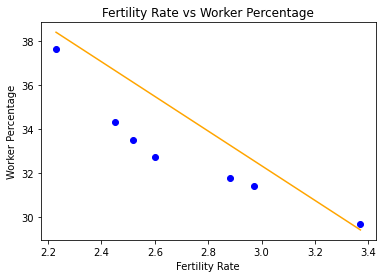

In [66]:
split = 0.66

evaluate_ridge_regression(dataset, split)

In [67]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


## Programming Part 5: Artificial Neural Network

Write a programme that can classify two different type of data points with high accuracy.


### Assessment task:

Write code to develop artificial neural network using the moons dataset. There are 18 steps involved, you will complete the code for steps 2, 3, 4, 5, 9, 10, 12, 13, and 14 only.

### Marks:

This part is of 6 Marks. 

### Instructions:

1. Write your Python code in place of "your code here" placeholder below.
2. Run your code by clicking on 'run' cell in the toolbar before you submit.
3. You will get the feedback once you submit the assignment.

### Submission:

Click on the submit button on the top right after you run the code.

#### Step 1
Import the libraries

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from csv import reader

#### Step 2
Load a CSV file

In [69]:
def load_csv(filename):

    dataset = list()
    # Opens the file in read only mode
    with open(filename, 'r') as f:
        csv_reader = reader(f)
        for row in csv_reader:
            dataset.append(row)
    return dataset


#### Step 3
extract only x data

In [70]:
def extract_only_x_data(dataset):

    if len(dataset) == 0:
        return

    data = list()
    for i in range(0, len(dataset)):
        data.append(list())

        for j in range(len(dataset[i]) - 1):
            data[-1].append(float(dataset[i][j]))
    return data


#### Step 4
extract only y data

In [71]:
def extract_only_y_data(dataset):

    if len(dataset) == 0:
        return

    data = list()
    for i in range(len(dataset)):
        data.append(int(dataset[i][-1]))

    return data


#### Step 5
Defining the Config that contains the inputs for the network, the outputs for the network as well as the parameters for gradient descent 

In [72]:
class Config:
    #Specify input layer dimensionality,  output layer dimensionality, learning rate for gradient descent, regularization strength
    neural_network_input_dimension = 2    # input layer dimensionality
    neural_network_output_dimension = 2   # output layer dimensionality
    learning_rate = 0.01                  # learning rate for gradient descent
    regularization_strength = 0.01        # regularization strength


#### Step 6
Generate two sets of some random data

In [73]:
def generate_data():
    filename = 'moons.csv'

    dataset = load_csv(filename)                            # load the data from a csv file

    x_data = extract_only_x_data(dataset)                   # extract the input data (2 inputs)
    y_data = extract_only_y_data(dataset)                   # extract the output data (1 output)
    
    X = np.array(x_data)                                    # convert the data into np array
    y = np.array(y_data)                                    # convert the data into np array

    return X, y                                             # returns both input (X) data and output (y) data

#### Step 7
Assign the X and y with the generated data

In [74]:
X, y = generate_data()

#### Step 8
Draw the scatter plot

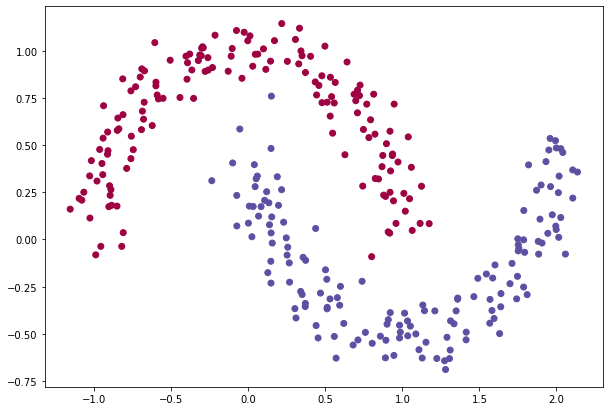

In [75]:
plt.figure(figsize=(10,7))                              # Defines the size of the plot
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Spectral)  # Draws a scatter plot

#### Step 9
Define sigmoid function

In [76]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))


#### Step 10
Define forward propagation function

In [77]:
def forward_propagation(X, W1, b1, W2, b2):
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    output = sigmoid(z2)
    return output


#### Step 11
Define backward propagation function

In [78]:
def backward_propagation(X, W1, b1, W2, b2, exp_scores, number_of_examples):
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        
    delta3 = probs
    delta3[range(number_of_examples), y] -= 1

    z2 = np.dot(X, W1) + b1
    a1 = np.tanh(z2)

    dW2 = (a1.T).dot(delta3)
    db2 = np.sum(delta3, axis=0, keepdims=True)

    delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
    
    dW1 = np.dot(X.T, delta2)
    
    # Add regularization terms (b1 and b2 don't have regularization terms)
    db1 = np.sum(delta2, axis=0)

    dW2 = dW2 + Config.regularization_strength * W2
    dW1 = dW1 + Config.regularization_strength * W1
    
    return dW1, dW2, db1, db2

#### Step 12
Define the loss function, used to evaluate how well the model is doing

In [79]:
def calculate_loss(model, X, y):
   
    number_of_examples = len(X)
    
    
    W1 = model['W1']
    b1 = model['b1']
    W2 = model['W2']
    b2 = model['b2']
    
    exp_scores = forward_propagation(X, W1, b1, W2, b2)
    
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    
    
    # Calculating the loss
    correct_logprobs = -np.log(probs[range(number_of_examples), y])
    data_loss = np.sum(correct_logprobs)
    
    data_loss = data_loss + Config.regularization_strength / 2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    
    return 1.0 / number_of_examples * data_loss


#### Step 13
Make a prediction

In [80]:
def predict(model, X):
 
    number_of_examples = len(X)
    
    W1 = model['W1']
    b1 = model['b1']
    W2 = model['W2']
    b2 = model['b2']
    
    exp_scores = forward_propagation(X, W1, b1, W2, b2)
    
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    
    return np.argmax(probs, axis=1)


#### Step 14
Build the neural network using batch gradient descent using the backpropagation derivates

In [81]:
def build_model(X, y, number_of_nodes_within_hidden_layer, passes=20000, print_loss=False):

    # Initialize the parameters to random values. We need to learn these
    
    
    number_of_examples = len(X)
    np.random.seed(0)
    
    # Two weights are needed as the network has two inputs
    # Likewise, two biases are needed as the network has two inputs
    W1 = np.random.randn(
        Config.neural_network_input_dimension, number_of_nodes_within_hidden_layer) / np.sqrt(Config.neural_network_input_dimension)
        
    b1 = np.zeros((1, number_of_nodes_within_hidden_layer))
    
    W2 = np.random.randn(
        number_of_nodes_within_hidden_layer, Config.neural_network_output_dimension) / np.sqrt(number_of_nodes_within_hidden_layer)
        
    b2 = np.zeros((1, Config.neural_network_output_dimension))
    
    model = {}
    
    for i in range(0, passes):
        # Forward Propgation
        

        exp_scores = forward_propagation(X, W1, b1, W2, b2)
        
        # Back Propgation
       
        
        dW1, dW2, db1, db2 = backward_propagation(X, W1, b1, W2, b2, exp_scores, number_of_examples);
        
        # Gradient descent parameter update
        W1 = W1 -Config.learning_rate * dW1
        b1 = b1 -Config.learning_rate * db1
        
        W2 = W2 -Config.learning_rate * dW2
        b2 = b2 -Config.learning_rate * db2
        
        # Assign new parameters to the model
        
        model = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        
        # This is expensive because it uses the whole dataset, so we don't want to do it too often.
        
        if print_loss and i % 1000 == 0:
            print("Loss after iteration %i: %f" % (i, calculate_loss(model, X, y)))
            
    return model


#### Step 15
Train the model

In [82]:
model = build_model(X, y, 3, print_loss=True, passes=20000)

Loss after iteration 0: 0.621375
Loss after iteration 1000: 0.032782
Loss after iteration 2000: 0.035074
Loss after iteration 3000: 0.035817
Loss after iteration 4000: 0.035904
Loss after iteration 5000: 0.035731
Loss after iteration 6000: 0.035468
Loss after iteration 7000: 0.035187
Loss after iteration 8000: 0.034919
Loss after iteration 9000: 0.034674
Loss after iteration 10000: 0.034455
Loss after iteration 11000: 0.034260
Loss after iteration 12000: 0.034087
Loss after iteration 13000: 0.033934
Loss after iteration 14000: 0.033798
Loss after iteration 15000: 0.033677
Loss after iteration 16000: 0.033569
Loss after iteration 17000: 0.033473
Loss after iteration 18000: 0.033387
Loss after iteration 19000: 0.033310


#### Step 16
Plot Decision Boundary

In [83]:
def plot_decision_boundary(pred_func, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the contour and training examples
    plt.title("Artificial Neural Network")
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.show()

#### Step 17
Visualize

In [84]:
def visualize(X, y, model):
    plot_decision_boundary(lambda x:predict(model, x), X, y)

#### Step 18
Call the visualize function

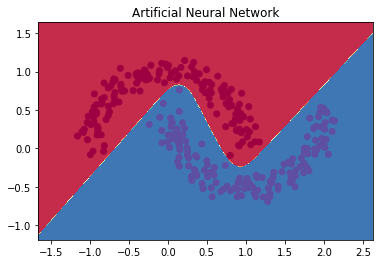

In [85]:
try:
    visualize(X, y, model)
except:
    print("Can not visualize the graph, the data or the model is inconsistent")

In [86]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [87]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In [88]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###
